<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E9_exponencial_sinlambda_KS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

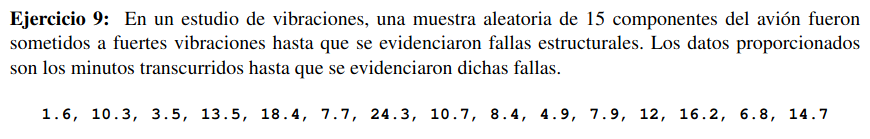

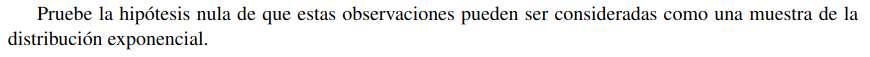

 D manual |  p manual |   D scipy |   p scipy
--------------------------------------------------
   0.2695 |    0.1882 |    0.2695 |    0.1880


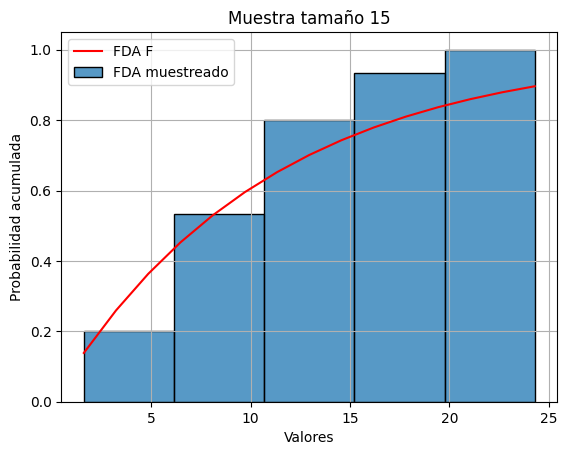

In [7]:
from numpy import sqrt, log, linspace, inf, exp
from random import random, seed, gammavariate, gauss
from scipy.stats import kstest
from scipy.special import erf
import seaborn as sns
import matplotlib.pyplot as plt

N_SIM = 100_000
MUESTRA_EMPIRICA = [1.6, 10.3, 3.5, 13.5, 18.4, 7.7, 24.3, 10.7, 8.4, 4.9, 7.9, 12, 16.2, 6.8, 14.7]
TAM_MUESTRA = len(MUESTRA_EMPIRICA)

def estimador_l(muestra):
    media_muestral = sum(muestra) / len(muestra)
    return 1 / media_muestral

ESTIMADOR_L = estimador_l(MUESTRA_EMPIRICA)

def F_fda(x, l=ESTIMADOR_L):
    return 1 - exp(-l*x)

def F_muestreador(n, l=ESTIMADOR_L):
    return [-log(1 - random())/l for _ in range(n)]

def estadistico_KS(muestra, F_fda):
    tamano_muestra = len(muestra)
    muestra_ordenada = sorted(muestra)
    D_max =  -inf

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = F_fda(y)
        D_minus = F_y - (j - 1) / tamano_muestra
        D_plus = j / tamano_muestra - F_y
        D_max = max(D_max, D_minus, D_plus)

    return D_max

def estimar_Pvalor_KS(muestra_empirica):
    tamano_muestra = len(muestra_empirica)
    d_empirico = estadistico_KS(muestra_empirica, F_fda)
    cuenta = 0
    for _ in range(N_SIM):
        # F_muestra = F_muestreador(tamano_muestra)
        # d_simulado = estadistico_KS(F_muestra, F_fda)
        U_muestra = [random() for _ in range(tamano_muestra)]
        d_simulado = estadistico_KS(U_muestra, lambda x: x)
        cuenta += d_empirico <= d_simulado
    return cuenta / N_SIM

seed(1)
p_valor = estimar_Pvalor_KS(MUESTRA_EMPIRICA)
d_estadistico = estadistico_KS(MUESTRA_EMPIRICA, F_fda)

d_correcto, p_valor_correcto = kstest(MUESTRA_EMPIRICA, cdf=F_fda)


print(f"{'D manual':>9} | {'p manual':>9} | {'D scipy':>9} | {'p scipy':>9}")
print("-" * 50)

print(f"{d_estadistico:9.4f} | {p_valor:9.4f} | {d_correcto:9.4f} | {p_valor_correcto:9.4f}")
dom = linspace(min(MUESTRA_EMPIRICA), max(MUESTRA_EMPIRICA), num=TAM_MUESTRA)
sns.lineplot(x=dom, y=F_fda(dom), label="FDA F", color="red")
sns.histplot(MUESTRA_EMPIRICA, stat="density", cumulative=True, label="FDA muestreado")
plt.title(f"Muestra tamaño {TAM_MUESTRA}")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True)
plt.show()

 D manual |  p manual |   D scipy |   p scipy
--------------------------------------------------
   0.2695 |    0.0487 |    0.2695 |    0.1880


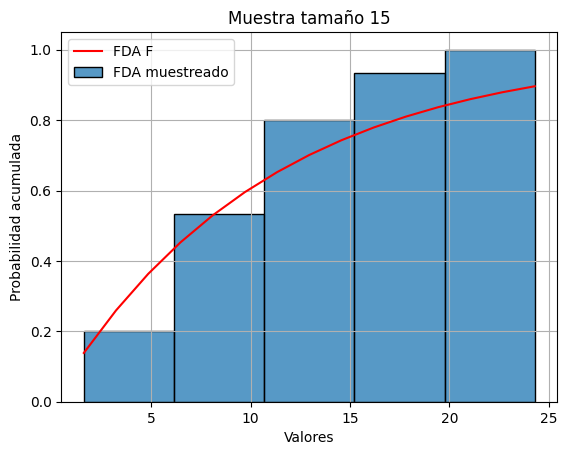

In [8]:

def estimar_Pvalor_KS_exaustivo(muestra_empirica, F_fda):
    tamano_muestra = len(muestra_empirica)
    d_empirico = estadistico_KS(muestra_empirica, F_fda)
    cuenta = 0
    for _ in range(N_SIM):
        F_muestra = F_muestreador(tamano_muestra)
        l_simulada = estimador_l(F_muestra)
        F_fda_simulada = lambda x : F_fda(x, l_simulada)
        d_simulado = estadistico_KS(F_muestra, F_fda_simulada)
        cuenta += d_empirico <= d_simulado
    return cuenta / N_SIM

seed(1)
p_valor = estimar_Pvalor_KS_exaustivo(MUESTRA_EMPIRICA, F_fda)
d_estadistico = estadistico_KS(MUESTRA_EMPIRICA, F_fda)
d_correcto, p_valor_correcto = kstest(MUESTRA_EMPIRICA, cdf=F_fda)

print(f"{'D manual':>9} | {'p manual':>9} | {'D scipy':>9} | {'p scipy':>9}")
print("-" * 50)

print(f"{d_estadistico:9.4f} | {p_valor:9.4f} | {d_correcto:9.4f} | {p_valor_correcto:9.4f}")
dom = linspace(min(MUESTRA_EMPIRICA), max(MUESTRA_EMPIRICA), num=TAM_MUESTRA)
sns.lineplot(x=dom, y=F_fda(dom), label="FDA F", color="red")
sns.histplot(MUESTRA_EMPIRICA, stat="density", cumulative=True, label="FDA muestreado")
plt.title(f"Muestra tamaño {TAM_MUESTRA}")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True)
plt.show()